# Loading Up Data

First, we import the moddules we will be using and import our clean Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import SRC.funciones as fu

In [2]:
Clean_Sharks = pd.read_csv('data/CleanSharks.csv', encoding = 'latin-1')


We also drop the 'Unnamed: 0' column as we will not be using it for this excercise

In [3]:
Clean_Sharks.drop(['Unnamed: 0'], axis =1)

,Activity_Regex,Age_Regex,Sex_Regex,Species_Regex,Fatal_Regex
0,paddling,57.0,f,White shark,n
1,swimming,18.0,m,Tiger shark,y
2,fishing,52.0,m,"lemon shark, 3'",n
3,walking,15.0,m,Bull shark,n
4,feeding sharks,32.0,m,grey reef shark,n
...,...,...,...,...,...
1922,skindiving,36.0,m,"""a pack of sharks""",n
1923,swimming,6.0,m,Bull shark,n
1924,swimming,16.0,m,Bull shark,n
1925,swimming,13.0,m,Bull shark,y


# Lets visualize some data

### H1 = Most fatal shark attacks happened to male surfers below the age of 40

to answer this hypothesis we will need to work with the activity, age, and sex columns.

### H2 = Most shark attacks where caused by great white sharks, which attacked mostly surfers
to answer this hypothesis we will need to work with Species column


# Do Most Shark Attacks Happen to Male Surfers Below 40?

To answer the first hypothesis, we need to find what the activity most prone to shark attacks is. To do this we will plot the count of activities mentioned in the data during a shark attack. 

In [4]:
Activities = Clean_Sharks['Activity_Regex']
Activities.value_counts()

surfing                             539
swimming                            346
spearfishing                        207
fishing                             136
wading                               69
                                   ... 
bending over                          1
finning the shark                     1
hand feeding sharks                   1
reviving a sedated shark              1
attempting to lasso shark's tail      1
Name: Activity_Regex, Length: 223, dtype: int64

We create an index of the top 10 most frequently reported activities to order our countplot

In [5]:
index10 = fu.createindex(Clean_Sharks, 'Activity_Regex', 10)
index10

Index(['surfing', 'swimming', 'spearfishing', 'fishing', 'wading',
       'scuba diving', 'snorkeling', 'standing', 'body boarding',
       'free diving'],
      dtype='object')

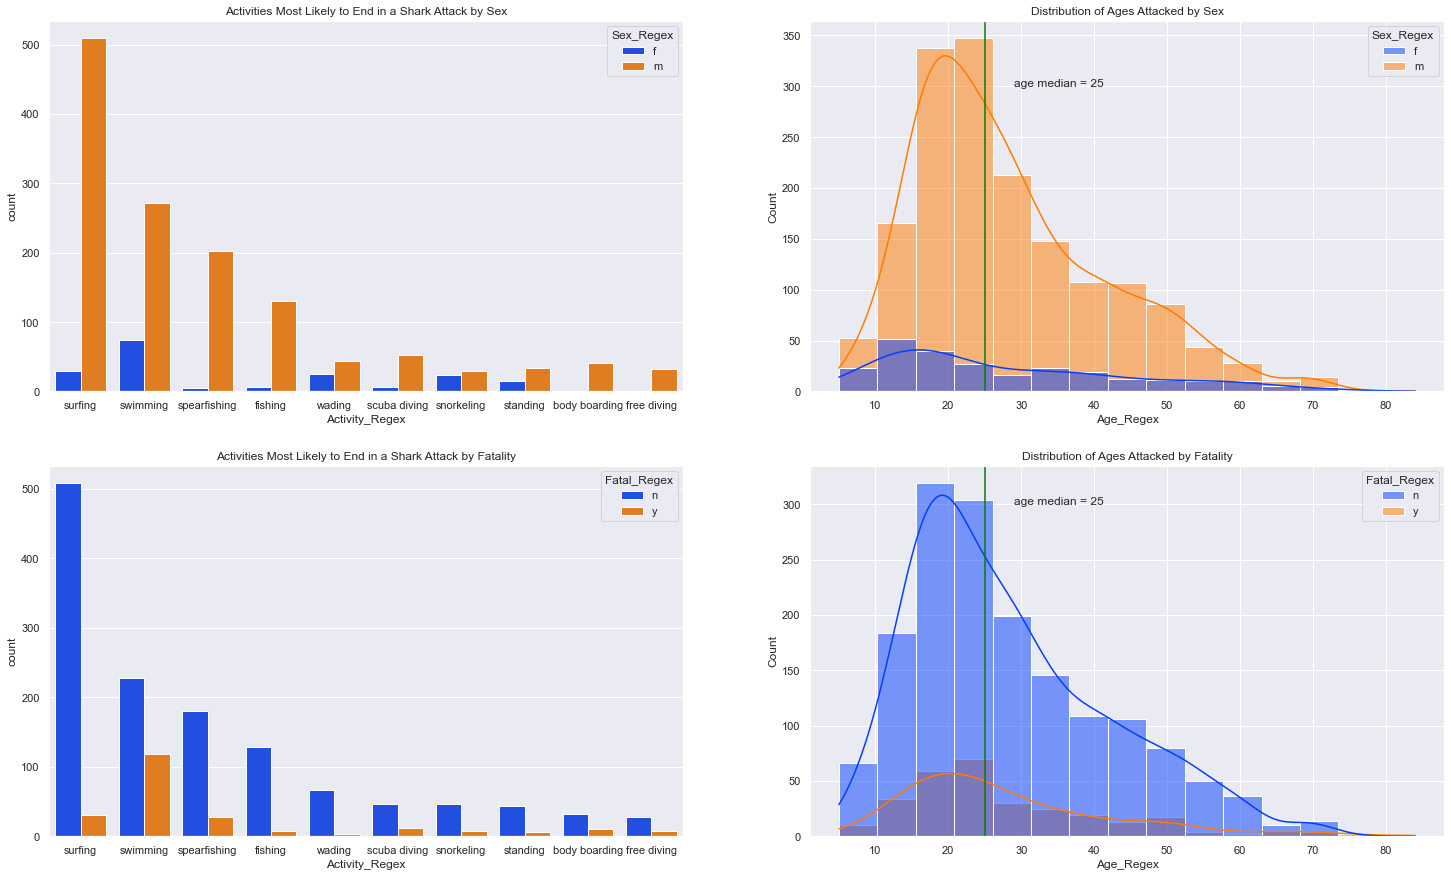

In [46]:
fig, axs = plt.subplots(nrows= 2, ncols=2, figsize=(25, 15))

sns.set(style='darkgrid')

Act_Count = sns.countplot( x = Activities , hue = Clean_Sharks['Sex_Regex'], order = index10, 
              ax=axs[0, 0], palette = 'bright')

Act_Hist = sns.histplot(x = Clean_Sharks.Age_Regex, hue = Clean_Sharks['Sex_Regex'],  ax=axs[0,1], bins = 15, 
            palette ='bright', kde = True)

Fatal_Count = sns.countplot( x = Activities , hue = Clean_Sharks['Fatal_Regex'], order = index10, 
              ax=axs[1, 0], palette = 'bright')

Fatal_Hist = sns.histplot(x = Clean_Sharks.Age_Regex, hue = Clean_Sharks['Fatal_Regex'],  ax=axs[1,1], bins = 15, 
            palette ='bright', alpha = .5, kde = True)

axs[0,1].axvline(Clean_Sharks.Age_Regex.median(), c = 'Green', label = 'mean')
axs[0,1].annotate("age median = 25", xy=(29, 300))
axs[1,1].axvline(Clean_Sharks.Age_Regex.median(), c = 'Green', label = 'mean')
axs[1,1].annotate("age median = 25", xy=(29, 300))

axs[0, 0].set_title('Activities Most Likely to End in a Shark Attack by Sex')
axs[0, 1].set_title('Distribution of Ages Attacked by Sex')
axs[1, 0].set_title('Activities Most Likely to End in a Shark Attack by Fatality')
axs[1, 1].set_title('Distribution of Ages Attacked by Fatality')

plt.show()

Act_Count.figure.savefig("Activity & Sex.jpg", dpi=550)



## It seems like most shark attacks do happen to male surfers. The mean age of all shark attacks seems to be 25 years old.

## However, the most fatal shark attack activity is swimming




# Are most shark fatal attacks perpetrated by White Sharks?

In [9]:
Species = Clean_Sharks.Species_Regex
Species
Index_Species = fu.createindex(Clean_Sharks, 'Species_Regex', 5)

## The Species most likely to cause a fatal attack is the White Shark

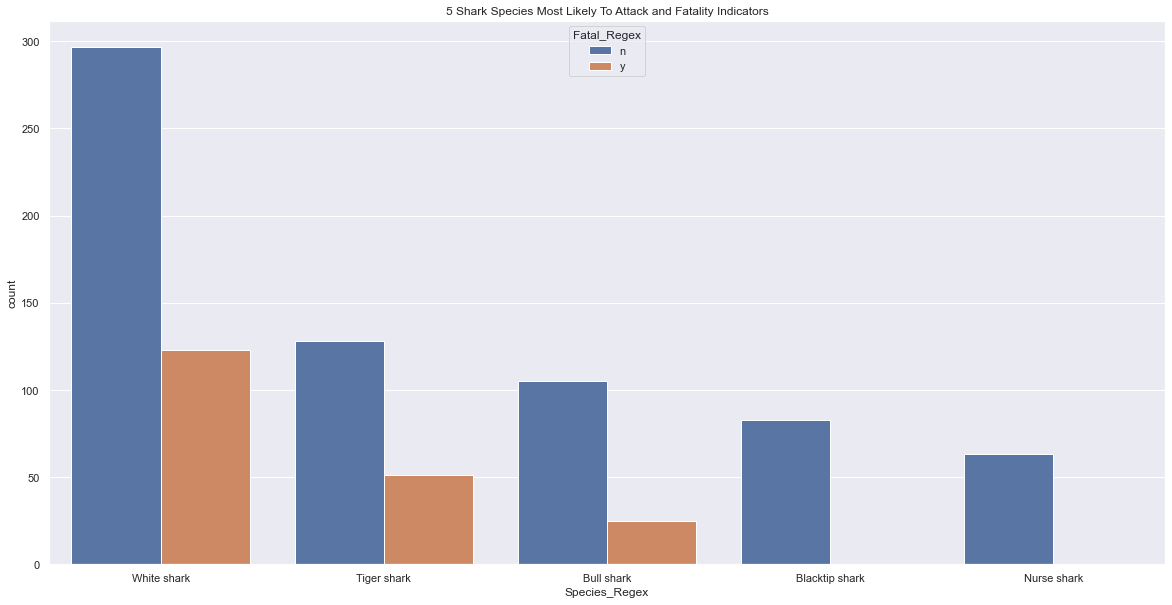

In [73]:
ax1, fig1 = plt.subplots(nrows= 1, ncols=1, figsize=(20, 10))
Species_Fatality = sns.countplot(x= Species, order = Index_Species, hue = Clean_Sharks['Fatal_Regex'])
plt.title('5 Shark Species Most Likely To Attack and Fatality Indicators')
plt.show()
Species_Fatality.figure.savefig("Species & Fatality.jpg", dpi=550)


In [14]:
White = Clean_Sharks.loc[:,'Species_Regex'] == 'White shark'
Clean_White_Sharks = Clean_Sharks.loc[White]

# Most White Shark Attacks happen to people surfing

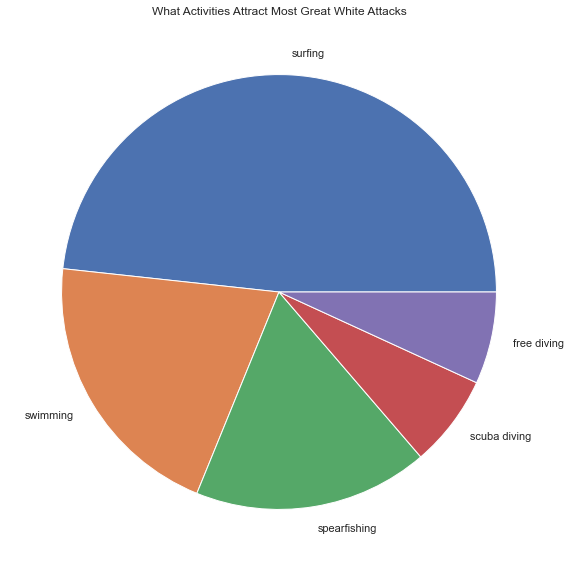

In [78]:
ax3, fig3 = plt.subplots(nrows= 1, ncols=1, figsize=(20, 10))
plt.pie(Clean_White_Sharks.Activity_Regex.value_counts().head(5),
        labels = Clean_White_Sharks.Activity_Regex.value_counts().head(5).index )
plt.title('What Activities Attract Most Great White Attacks')
plt.savefig("White Sharks Attack Activities.jpg", dpi=550)
plt.show()
